In [ ]:
import numpy as np
import math as math
import scipy as sc
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn as sk
from sklearn.impute import SimpleImputer, KNNImputer

# Fáza 2
Pomer práce 50% - 50%

Autori: Jakub Smorada, Adrian Szacsko

Z fázy 1 sme presunuli odstránenie a výmenu vychýlených hodnôt do fázy 2.

Na začiatku sme načítali datasety z .csv súborov, ktoré sme na konci fázy 1 uložili.

In [ ]:
dataset = pd.read_csv("faza1/labor.csv", delimiter=",")
dataprofiles = pd.read_csv("faza1/profiles.csv", delimiter=",")
sns.set_theme(style="dark", palette="rocket")
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataprofiles.drop(dataprofiles.columns[0], axis=1, inplace=True)

## 1. Integrácia a čistenie dát

### Skúšanie rôznych stratégií pre vyriešenie problému chýbajúcich hodnôt

#### Odstránenie pozorovaní s chýbajúcimi údajmi

Teraz vyskúšame odstránenie záznamov s chýbajúcimi hodnotami.

In [ ]:
dataset.info()

In [ ]:
dataset_dropped = dataset.dropna()
dataset_dropped.info()

Po použití funkcie **dropna()** vidíme, že počet záznamov v každom stĺpci je jednotný.

#### Nahradenie chýbajúcich hodnôt

Táto funkcia slúži na zobrazenie rozdielu v zmenených dátach pomocou grafov.

In [ ]:
def difference_graphs(changed_dataset):
    fig, ax=mt.pyplot.subplots(3,2, figsize=(12,6))
    fig.tight_layout()
    ax[0, 0].set_title('Pôvodné', fontsize=16)
    ax[0, 1].set_title('Zmenené', fontsize=16)
    sns.histplot(data=dataset["hematokrit"],ax=ax[0, 0], bins=50, kde=True)
    sns.histplot(data=changed_dataset["hematokrit"], ax=ax[0,1], bins=50, kde=True)
    sns.histplot(data=dataset["erytrocyty"],ax=ax[1,0], bins=50, kde=True)
    sns.histplot(data=changed_dataset["erytrocyty"], ax=ax[1,1], bins=50, kde=True)
    sns.histplot(data=dataset["alt"],ax=ax[2,0], bins=50, kde=True)
    sns.histplot(data=changed_dataset["alt"], ax=ax[2,1], bins=50, kde=True)

Pozrime sa najprv na hodnoty datasetu pred vykonanými zmenami.

In [ ]:
desc_stat_table = dataset.select_dtypes(include=[np.float64])
desc_stat = dataset.describe()
# modus nie je mozne urobit, su unikátne
desc_stat.style

#### Nahradenie chýbajúcej hodnoty mediánom

In [ ]:
dataset.info()

In [ ]:
temp_dataset = dataset[dataset.describe().columns]
imp=SimpleImputer(missing_values=np.NaN, strategy='median')
dataset_median=pd.DataFrame(imp.fit_transform(temp_dataset))
dataset_median.columns=temp_dataset.columns
dataset_median.index=temp_dataset.index

In [ ]:
dataset_median.info()

In [ ]:
desc_stat_table = dataset_median.select_dtypes(include=[np.float64])
desc_stat = dataset_median.describe()
desc_stat.style

Pri náhrade chýbajúcich hodnôt mediánom sa nám zmenila iba smerodajná odchýlka (std = standard deviation). Medián sa nám v tomto prípade nezmení, pretože stredná hodnota bude stále rovnaká.

In [ ]:
difference_graphs(dataset_median)

#### Nahradenie chýbajúcej hodnoty priemerom

In [ ]:
dataset.info()

In [ ]:
temp_dataset = dataset[dataset.describe().columns]
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
dataset_mean=pd.DataFrame(imp.fit_transform(temp_dataset))
dataset_mean.columns=temp_dataset.columns
dataset_mean.index=temp_dataset.index

In [ ]:
dataset_mean.info()

In [ ]:
desc_stat_table = dataset_mean.select_dtypes(include=[np.float64])
desc_stat = dataset_mean.describe()
desc_stat.style

Z tejto tabuľky môžeme vidieť, že aj tuná sa nám zmenilo zopár hodnôt (napr. std), no táto zmena je nesignifikantne malá. 

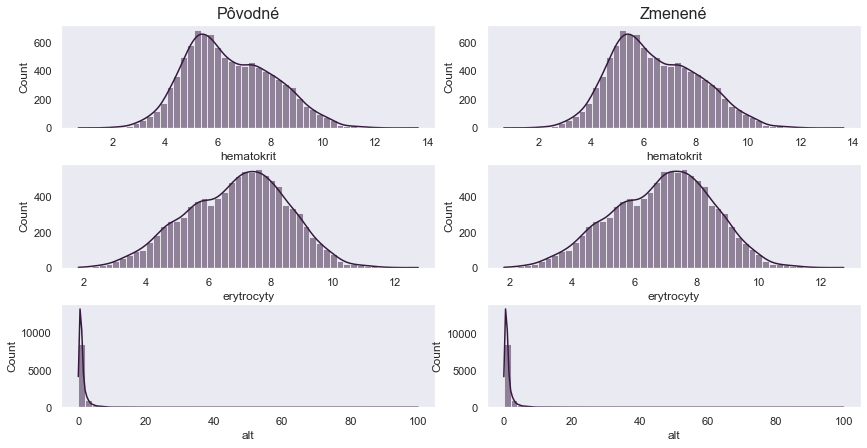

In [ ]:
difference_graphs(dataset_mean)

#### Nahradenie chýbajúcej hodnoty pomocou lineárnej regresie

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10039 non-null  object 
 1   hematokrit    10008 non-null  float64
 2   smoker        10039 non-null  int64  
 3   leukocyty     10009 non-null  float64
 4   relationship  10039 non-null  object 
 5   ssn           10039 non-null  object 
 6   alt           10009 non-null  float64
 7   weight        10039 non-null  float64
 8   erytrocyty    10009 non-null  float64
 9   alp           10008 non-null  float64
 10  ast           10009 non-null  float64
 11  er-cv         10009 non-null  float64
 12  etytr         10008 non-null  float64
 13  hemoglobin    10009 non-null  float64
 14  trombocyty    10009 non-null  float64
 15  indicator     10039 non-null  float64
 16  hbver         10009 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
temp_dataset = dataset[dataset.describe().columns]
imp=KNNImputer()
dataset_knn=pd.DataFrame(imp.fit_transform(temp_dataset))
dataset_knn.columns=temp_dataset.columns
dataset_knn.index=temp_dataset.index

In [ ]:
dataset_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hematokrit  10039 non-null  float64
 1   smoker      10039 non-null  float64
 2   leukocyty   10039 non-null  float64
 3   alt         10039 non-null  float64
 4   weight      10039 non-null  float64
 5   erytrocyty  10039 non-null  float64
 6   alp         10039 non-null  float64
 7   ast         10039 non-null  float64
 8   er-cv       10039 non-null  float64
 9   etytr       10039 non-null  float64
 10  hemoglobin  10039 non-null  float64
 11  trombocyty  10039 non-null  float64
 12  indicator   10039 non-null  float64
 13  hbver       10039 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


In [ ]:
desc_stat_table = dataset_knn.select_dtypes(include=[np.float64])
desc_stat = dataset_knn.describe()
desc_stat.style

,hematokrit,smoker,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000
mean,6.453299,0.397151,6.450335,1.305379,69.805192,6.899219,71.951744,52.344764,49.057808,6.476673,6.464171,6.828220,0.642295,6.475636
std,1.663900,0.489332,1.698423,2.077883,35.581044,1.604007,18.085580,11.867875,13.069799,0.992852,1.004901,1.732407,0.479349,1.003313
min,0.683890,0.000000,0.979140,0.000000,-59.892790,1.811270,0.000000,0.000000,0.000000,2.678710,3.054200,0.000000,0.000000,2.738210
25%,5.200780,0.000000,5.182090,0.521925,46.183730,5.754635,63.858900,44.508395,40.422950,5.804560,5.788555,5.667885,0.000000,5.808030
50%,6.228380,0.000000,6.352150,0.774260,70.018130,7.036380,78.182920,52.376500,48.922860,6.480240,6.474590,7.000970,1.000000,6.478430
75%,7.664870,1.000000,7.690450,1.343930,93.175640,8.050015,84.964250,60.274460,57.753990,7.145585,7.139715,8.077000,1.000000,7.145240
max,13.633550,1.000000,12.694630,100.000000,188.436090,12.733320,100.000000,100.000000,100.000000,11.426920,10.112330,12.595220,1.000000,10.361820


Nahradením chýbajúcich hodnotu lineárnou regresiou sa nám zmenil priemer, medián, ale aj smerodajná odchylka.

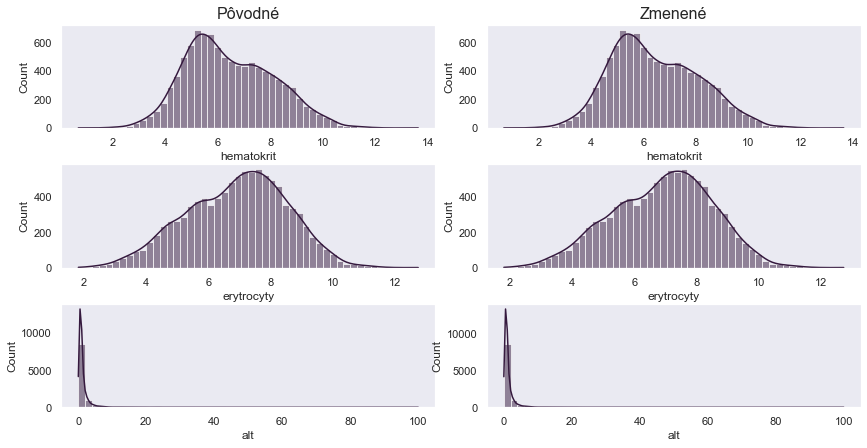

In [ ]:
difference_graphs(dataset_knn)

Pomocou týchto grafov môžeme vidieť, že výskyt jednotlivých atribútov sa nám nijak zásadne nezmenil.
Toto môžeme pozorovať pri všetkých nahradeniach hodnôt.

### Nahradenie a odstránenie vychýlených hodnôt

#### Odstránenie vychýlených hodnôt pomocou smerodajnej odchýlky

Vo funkcii del_outliers() si v premennej outliers uchovávame všetky vychýlené hodnoty. Naopak v premennej outliers_removed si uchovávame dobré hodnoty (tie, ktoré nie sú vychýlené). Funkcia nám vypíše počet vychýlených hodnôt pre každý stĺpec a následne vráti premennú outliers_removed.

In [ ]:
def del_outliers(data, column):
    data_mean, data_std = np.mean(data), np.std(data)

    # define outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Počet vychýlených hodnôt v stĺpci ' + column + ': %d' % len(outliers))

    outliers_removed = []
    for x in data:
        if x >= lower and x <= upper:
            outliers_removed.append(x)
        else:
            outliers_removed.append(np.nan)
    # remove outliers
    #outliers_removed = [x for x in data if x >= lower and x <= upper else np.nan]
    return outliers_removed
    #print('Non-outlier observations: %d' % len(outliers_removed))

Dataset s odstránenými vychýlenými hodnotami si uložíme do premennej deleted_outliers.

In [ ]:
temp_data = dataset.describe()
deleted_outliers = dataset.copy()
for col in temp_data.columns:
    if col != 'smoker' and col != 'weight':
        deleted_outliers[col] = del_outliers(deleted_outliers[col], col)
# deleted_outliers.dropna(inplace=True)

Počet vychýlených hodnôt v stĺpci hematokrit: 14
Počet vychýlených hodnôt v stĺpci leukocyty: 5
Počet vychýlených hodnôt v stĺpci alt: 123
Počet vychýlených hodnôt v stĺpci erytrocyty: 3
Počet vychýlených hodnôt v stĺpci alp: 150
Počet vychýlených hodnôt v stĺpci ast: 29
Počet vychýlených hodnôt v stĺpci er-cv: 27
Počet vychýlených hodnôt v stĺpci etytr: 35
Počet vychýlených hodnôt v stĺpci hemoglobin: 31
Počet vychýlených hodnôt v stĺpci trombocyty: 21
Počet vychýlených hodnôt v stĺpci indicator: 0
Počet vychýlených hodnôt v stĺpci hbver: 37


#### Úprava vychýlených hodnôt pomocou funkcie Winsorize

Teraz vyskúšame vychýlené hodnoty nie odstrániť, ale upraviť. To spravíme pomocou funkcie winsorize.

#### Ako funguje Winsorize:

Funkcia winsorize nám nahradí vychýlené hodnoty maximálnými a minimálnymi hodnotami z distribúcie.
Najprv sa rozhodnime, koľko údajov chceme zmeniť. Toto je uvedené ako percento nedotknutých údajov.

Napríklad, ak chceme chceme zmeniť horných 5% a dolných 5% údajov,
rovná sa to 100% – 5% – 5% = 90%. 80% winsorizácia znamená, že 10% údajov je
upravených z hornej aj dolnej časti distribúcie.


Napríklad:
Nasledujúci súbor údajov má niekoľko (tučným písmom) extrémov:

{**0.1, 1**, 12, 14, 16, 18, 19, 21, 24, 26, 29, 32, 33, 35, 39, 40, 41, 44, **99, 125**}

Priemer = 33,405.

Po úprave horných a spodných 10 % (tieto hodnoty som priradil k najbližšiemu extrému):

{**12, 12**,12, 14, 16, 18, 19, 21, 24, 26, 29, 32, 33, 35, 39, 40, 41, 44, **44, 44**}

80 %-ná winsorizácia:

Priemer = 24,95.


Pre každý stĺpec, ktoré obsahujú číselné hodnoty (okrem smoker a weight) sa vykoná funkcia winsorize.

In [ ]:
winsorized = dataset.copy()
temp_data = dataset.describe()
for col in temp_data.columns:
    if col != 'smoker' and col != 'weight':
        winsorized[col] = sc.stats.mstats.winsorize(winsorized[col], limits=[0.05,0.05])

Porovnajme pôvodoný dataset, dataset s odstráneými hodnotami a dataset s upravenými hodnotami:

In [ ]:
print("--------------------------------------Pôvodný dataset-------------------------------------------")
dataset.describe()

--------------------------------------Pôvodný dataset-------------------------------------------


,hematokrit,smoker,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,10008.000000,10039.000000,10009.000000,10009.000000,10039.000000,10009.000000,10008.000000,10009.000000,10009.000000,10008.000000,10009.000000,10009.00000,10039.000000,10009.000000
mean,6.453032,0.397151,6.450274,1.306090,69.805192,6.898802,71.949719,52.343359,49.060376,6.476717,6.464414,6.82846,0.642295,6.475601
std,1.665991,0.489332,1.700428,2.080683,35.581044,1.605785,18.109229,11.880597,13.084279,0.994156,1.006072,1.73433,0.479349,1.004527
min,0.683890,0.000000,0.979140,0.000000,-59.892790,1.811270,0.000000,0.000000,0.000000,2.678710,3.054200,0.00000,0.000000,2.738210
25%,5.197180,0.000000,5.177990,0.521560,46.183730,5.748830,63.818647,44.490180,40.393810,5.802672,5.786020,5.66519,0.000000,5.806840
50%,6.227605,0.000000,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.00289,1.000000,6.478430
75%,7.669982,1.000000,7.693890,1.344220,93.175640,8.052080,84.986902,60.275100,57.766910,7.147997,7.140870,8.07872,1.000000,7.147590
max,13.633550,1.000000,12.694630,100.000000,188.436090,12.733320,100.000000,100.000000,100.000000,11.426920,10.112330,12.59522,1.000000,10.361820


In [ ]:
print("--------------------------------------Dataset s upravenými hodnotami-------------------------------------------")
winsorized.describe()

--------------------------------------Dataset s upravenými hodnotami-------------------------------------------


,hematokrit,smoker,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000,10039.000000
mean,6.459320,0.397151,6.456612,1.153148,69.805192,6.911384,72.433079,52.399636,49.155455,6.484363,6.470261,6.848030,0.642295,6.480217
std,1.559986,0.489332,1.600537,0.974817,35.581044,1.500056,16.568441,10.832049,11.946261,0.907813,0.923820,1.606626,0.479349,0.917054
min,4.052670,0.000000,3.799520,0.314460,-59.892790,4.156950,32.524120,32.984730,27.585170,4.862680,4.799480,3.779150,0.000000,4.827710
25%,5.201395,0.000000,5.182615,0.521930,46.183730,5.755025,63.896465,44.512470,40.436145,5.805255,5.788715,5.669255,0.000000,5.808145
50%,6.237880,0.000000,6.363060,0.776160,70.018130,7.039000,78.258680,52.430130,48.987710,6.483450,6.478570,7.010380,1.000000,6.481790
75%,7.684080,1.000000,7.716355,1.354475,93.175640,8.062485,85.046975,60.368165,57.864150,7.155765,7.146075,8.085900,1.000000,7.156050
max,9.399770,1.000000,9.338690,4.053250,188.436090,9.417820,90.882980,72.119550,70.899590,8.133510,8.148320,9.471360,1.000000,8.122320


Môžeme vidieť, že sa nám zmenili maximálne a minimálne hodnoty. Pred úpravou mali dáta väčší rozsah (v stĺpci hematokrit bolo minimum 0,68 a maximum 13,63). Po úprave majú dáta menší rozsah (v stĺpci hematokrit je teraz minimum 4,05 a maximum 9,39). Zatiaľ čo sa nám zmenil rozsah (minimum a maximum), táto zmena nijak signifikantne neovplyvnila priemer dát.

In [ ]:
print("--------------------------------------Dataset s odstránenými hodnotami-------------------------------------------")
deleted_outliers.describe()

--------------------------------------Dataset s odstránenými hodnotami-------------------------------------------


,hematokrit,smoker,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,9994.000000,10039.000000,10004.000000,9886.000000,10039.000000,10006.000000,9858.000000,9980.000000,9982.000000,9973.000000,9978.000000,9988.000000,10039.000000,9972.000000
mean,6.446566,0.397151,6.448513,1.150476,69.805192,6.898246,72.848180,52.336281,49.072998,6.476806,6.461917,6.838517,0.642295,6.470150
std,1.654542,0.489332,1.696028,1.096122,35.581044,1.603436,16.699842,11.693404,12.905859,0.976426,0.991161,1.715132,0.479349,0.986517
min,1.638490,0.000000,1.734990,0.000000,-59.892790,2.099090,17.667380,16.939980,10.041910,3.496260,3.448960,1.639550,0.000000,3.463950
25%,5.196603,0.000000,5.177907,0.518940,46.183730,5.749650,64.805808,44.510150,40.438273,5.806230,5.787620,5.671335,0.000000,5.806870
50%,6.224495,0.000000,6.351070,0.764770,70.018130,7.036000,78.471375,52.376545,48.927910,6.480160,6.475440,7.005975,1.000000,6.476170
75%,7.664022,1.000000,7.691565,1.307713,93.175640,8.051857,85.076815,60.248820,57.754070,7.145170,7.136963,8.079702,1.000000,7.141455
max,11.436690,1.000000,11.525610,7.504680,188.436090,11.700850,100.000000,87.866390,88.105970,9.418950,9.452070,11.821450,1.000000,9.485140


Tu môžeme vidieť, že sa nám taktiež zmenili minimálne a maximálne hodnoty. Dôvodom je, že sme odstránili vychýlené hodnoty, ktoré boli buď príliš veľké alebo príliš malé. Ostatné hodnoty sa nijak signifikantne nezmenili.

In [ ]:
def changes_after_winsorize(column):
    fig, ax=mt.pyplot.subplots(1,3, figsize=(12,6))
    fig.tight_layout()
    ax[0].set_title('Pôvodné', fontsize=16)
    ax[1].set_title('Winsorize', fontsize=16)
    ax[2].set_title('Odstránenie', fontsize=16)
    sns.histplot(data=dataset[column],ax=ax[0], bins=50, kde=True)
    sns.histplot(data=winsorized[column], ax=ax[1], bins=50, kde=True)
    sns.histplot(data=deleted_outliers[column], ax=ax[2], bins=50, kde=True)
    #plt.axis([2,12,0,620])

Porovnajme hodnoty v stĺpci **Hematokrit** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

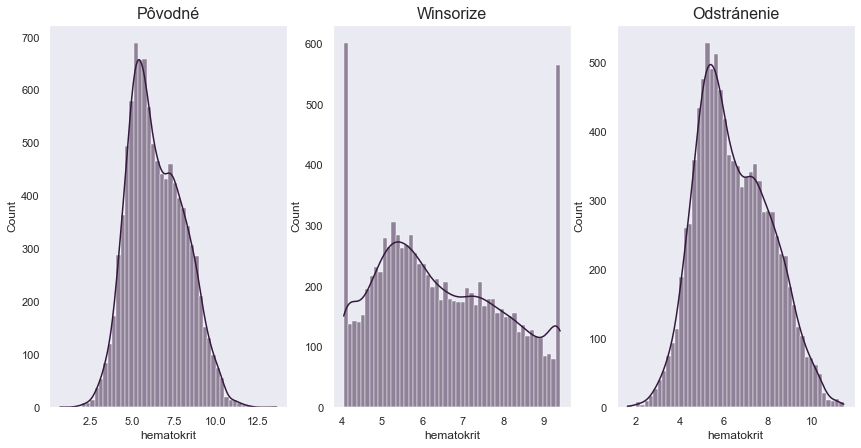

In [ ]:
changes_after_winsorize("hematokrit")

Ako bolo spomenuté vyššie, priemer dát sa nijak signifikantne nezmenil. Jediné čo sa zmenilo je rozsah dát.

Porovnajme hodnoty v stĺpci **Leukocyty** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

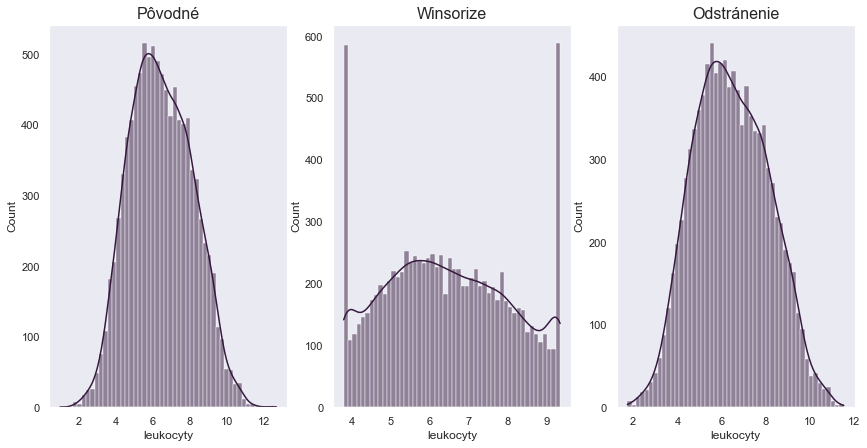

In [ ]:
changes_after_winsorize("leukocyty")

Porovnajme hodnoty v stĺpci **Alt** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

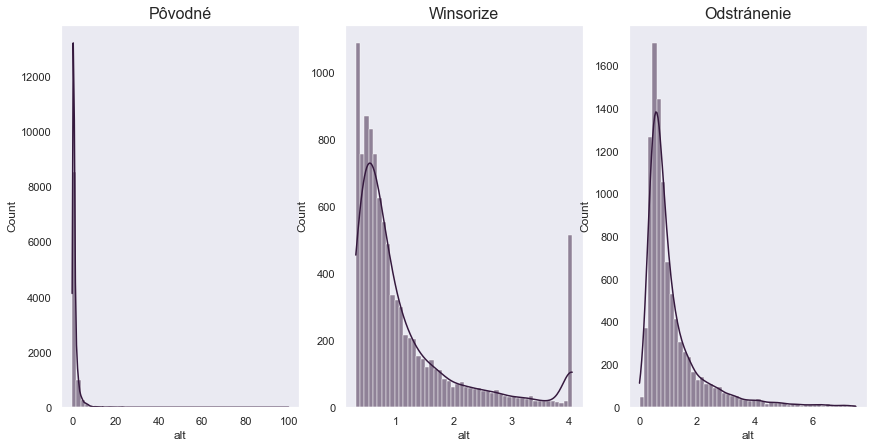

In [ ]:
changes_after_winsorize("alt")

Ako môžeme vidieť funkcia winsorize znovu upravila rozsah dát. Atribút **alt** mal predtým rozsah od 0 po 100, zatiaľčo pri hodnote 0 až 4 bolo týchto záznamov najviac.

Po odstranení sa v datasete taktiež zmenil rozsah dát.

Porovnajme hodnoty v stĺpci **Erytrocyty** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

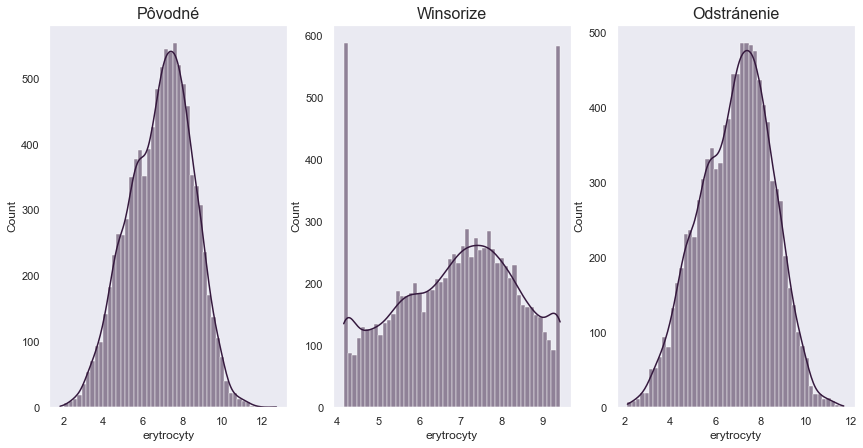

In [ ]:
changes_after_winsorize("erytrocyty")

Porovnajme hodnoty v stĺpci **Alp** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

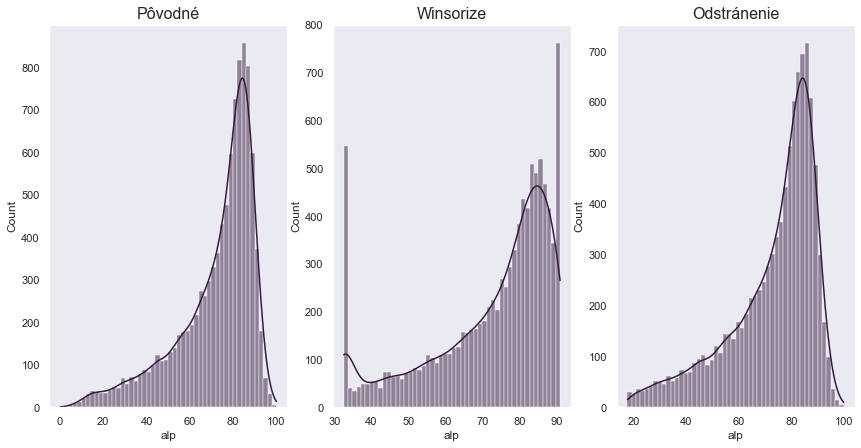

In [ ]:
changes_after_winsorize("alp")

Porovnajme hodnoty v stĺpci **Ast** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

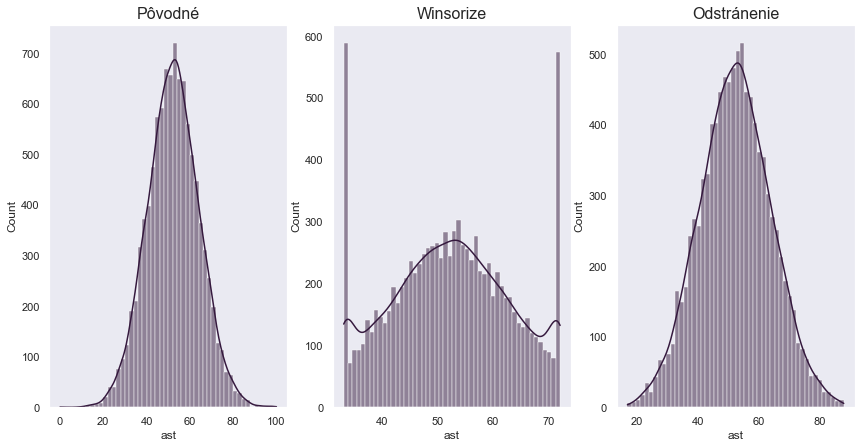

In [ ]:
changes_after_winsorize("ast")

Porovnajme hodnoty v stĺpci **Er-cv** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

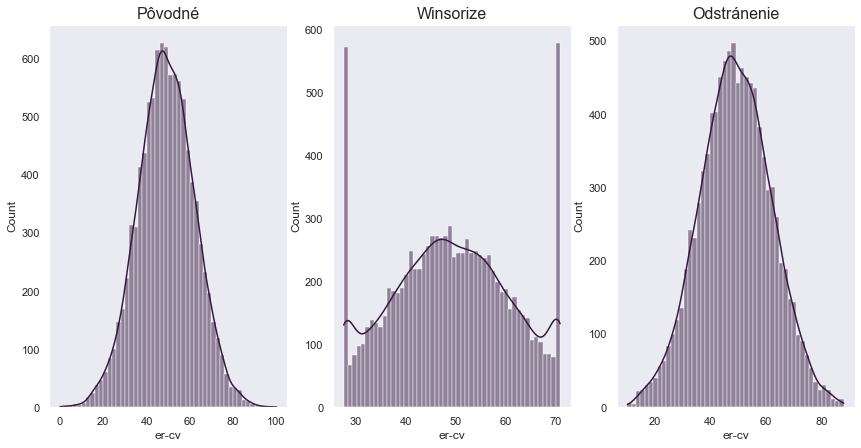

In [ ]:
changes_after_winsorize("er-cv")

Porovnajme hodnoty v stĺpci **Etytr** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

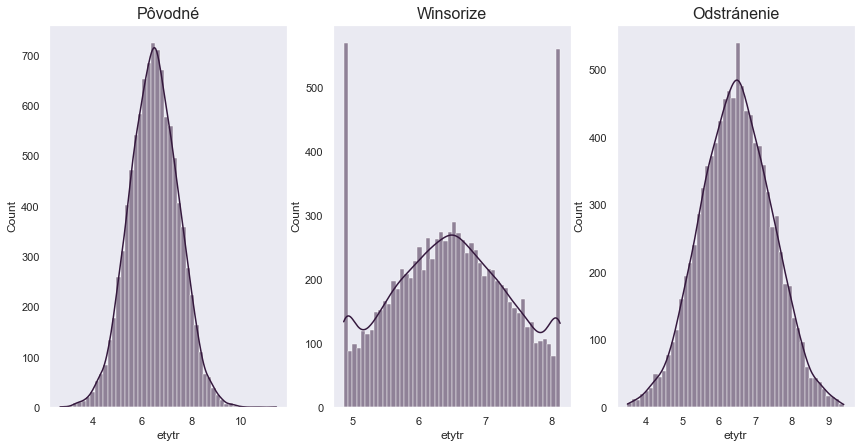

In [ ]:
changes_after_winsorize("etytr")

Porovnajme hodnoty v stĺpci **Hemoglobin** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

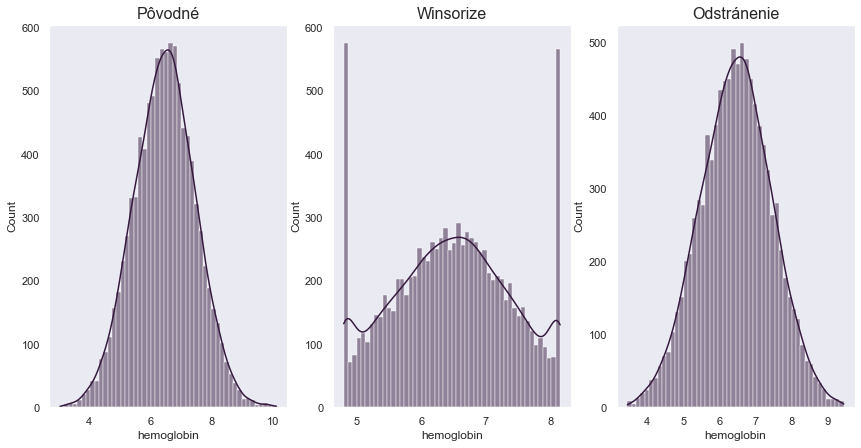

In [ ]:
changes_after_winsorize("hemoglobin")

Porovnajme hodnoty v stĺpci **Trombocyty** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

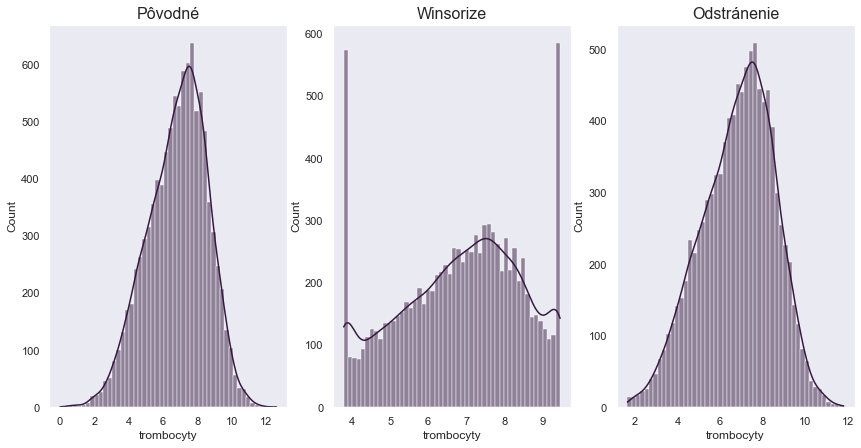

In [ ]:
changes_after_winsorize("trombocyty")

Porovnajme hodnoty v stĺpci **Hbver** z pôvodného datasetu, datasetu s upravenými hodnotami a datasetu s odstranenými hodnotami:

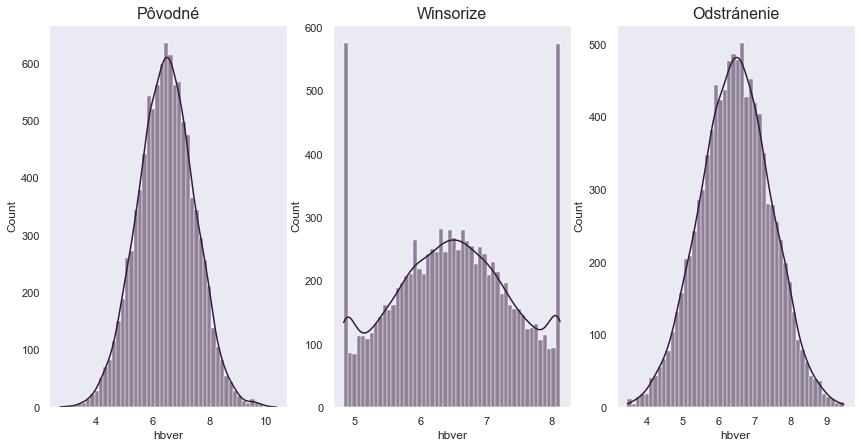

In [ ]:
changes_after_winsorize("hbver")

### Naša implementácia

Z datasetu sme odstránili záznamy, ktoré nemajú všetky atribúty (nachádza sa tam NaN).
Vymenili sme chybné dáta (tam kde boli nejaké preklepy) a resetovali sme indexy celého datasetu.
Následne odstránime vychýlené hodnoty z jednotlivých stĺpcov.

In [ ]:
dataset.dropna(inplace=True)

temp_data = dataset.describe()
for col in temp_data.columns:
    if col != 'smoker' and col != 'weight':
        dataset[col] = sc.stats.mstats.winsorize(dataset[col], limits=[0.05,0.05])

dataset["relationship"].replace("divoced","divorced",inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset["relationship"].replace("nop","not specified",inplace=True)
dataset

,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,0,3.79699,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,3.77915,0.0,6.73439
1,David Cook,6.06717,0,6.61722,divorced,134-25-6459,1.10335,80.56053,7.13748,90.67608,51.14865,27.63148,6.17378,6.30636,3.77915,0.0,6.69188
2,Debra Cameron,8.52161,1,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
3,Vincent Mccullough,4.35962,0,6.61320,divorced,469-50-8029,3.91503,93.52107,9.37966,82.12788,71.76488,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
4,Lauren Harris,5.32524,1,6.52586,divorced,755-50-6094,0.89996,57.01768,7.78640,80.50126,44.08776,60.41555,5.33112,6.68497,7.49621,1.0,6.88636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,Kenneth Sanchez,4.67432,0,5.22478,married,035-07-2574,0.75385,4.79395,7.40597,80.98445,42.89142,47.93544,5.69357,6.46889,4.59180,0.0,6.23398
9709,Jennifer Franklin,5.38144,1,6.77403,widowed,369-05-1763,0.68170,72.43763,7.38835,88.27656,55.07674,43.86325,5.33810,6.04664,8.02259,1.0,7.56910
9710,Valerie Carter,4.05369,1,6.30583,married,546-10-0083,0.49297,26.26844,6.22727,49.46443,56.32268,59.28561,8.10294,4.80315,9.44110,1.0,7.53199
9711,Julie Newman,4.80303,1,6.78358,widowed,556-01-2815,1.92676,57.92751,8.64693,44.97615,53.85140,56.17723,7.25014,8.11485,6.77935,1.0,4.97849


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9713 non-null   object 
 1   hematokrit    9713 non-null   float64
 2   smoker        9713 non-null   int64  
 3   leukocyty     9713 non-null   float64
 4   relationship  9713 non-null   object 
 5   ssn           9713 non-null   object 
 6   alt           9713 non-null   float64
 7   weight        9713 non-null   float64
 8   erytrocyty    9713 non-null   float64
 9   alp           9713 non-null   float64
 10  ast           9713 non-null   float64
 11  er-cv         9713 non-null   float64
 12  etytr         9713 non-null   float64
 13  hemoglobin    9713 non-null   float64
 14  trombocyty    9713 non-null   float64
 15  indicator     9713 non-null   float64
 16  hbver         9713 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


Teraz môžeme vidieť, že v každom stĺpci je jednotný počet záznamov.

Začíname pracovať aj s druhým datasetom, v ktorom máme profily jednotlivých pacientov. Aj tu urobíme menšie úpravy preto, aby sme s dátami vedeli pracovať lepšie.

Z tohto datasetu sme odstránili duplikáty. Okrem duplikátov sme odstránili aj také záznamy, v ktorých neboli všetky informácie. Vymenili sme chybné stringy a zmazali prvý stĺpec, kde sme mali indexy záznamov, nakoľko nám to pandas sám pridá.

In [ ]:
# Second dataset

dataprofiles = pd.read_csv("042/profiles.csv", delimiter="\t")
dataprofiles.drop(dataprofiles.columns[0], axis=1, inplace=True)
dataprofiles.drop_duplicates(subset="ssn", inplace=True)
dataprofiles['birthdate'] = pd.to_datetime(dataprofiles['birthdate'])
dataprofiles.dropna(inplace=True)
dataprofiles.replace({"black":"Black","blsck":"Black","white":"White"}, inplace=True)

Vypíšeme si unikátne záznamy zo stĺpca **blood_group** na overenie:

In [ ]:
print(dataprofiles['blood_group'].unique())

['A-' 'O-' 'O+' 'A+' 'AB+' 'B-' 'AB-' 'B+']


Ako si môžeme všimnúť tak informácie o váhe sú niekedy veľmi chybné. Preto je potrebné ich upraviť.

In [ ]:
dataset["weight"].describe()

count    9713.000000
mean       69.800152
std        35.583137
min       -59.892790
25%        46.192270
50%        70.065660
75%        93.195840
max       188.436090
Name: weight, dtype: float64

Zistíme približný počet koľko je v datasete v stĺpci "weight" vychýlených hodnôt.

In [ ]:
dataset['weight'].describe()
counter=0
for i in dataset['weight']:
    if i<=35:
        counter+=1
        #print(i, end=" ")

print("Počet vychýlených hodnôt:", counter)

Počet vychýlených hodnôt: 1572


Zostrojme si graf, ktorý nám povie viac o hodnotách v stĺpci "weight".

<AxesSubplot:xlabel='weight', ylabel='Density'>

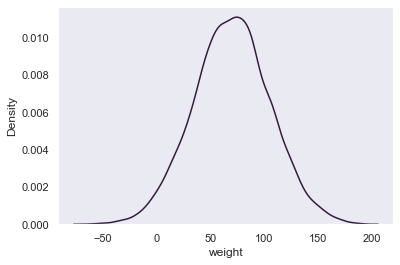

In [ ]:
sns.kdeplot(data=dataset['weight'])

Skúsme aplikovať funkciu winsorize na vychýlené hodnoty v stĺpci "weight".

<AxesSubplot:ylabel='Density'>

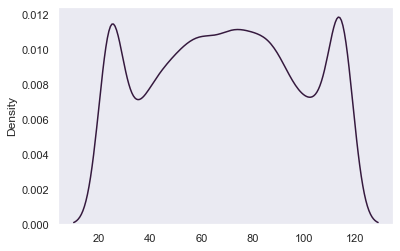

In [ ]:
sns.kdeplot(data=sc.stats.mstats.winsorize(dataset['weight'], limits=[0.1,0.1]))

Ako z grafu vidíme, winsorize nám kvôli negatívnym a vychýleným hodnotám nepomôže.

Čo teda môžeme spraviť je, že odstraníme všetky vychýlené hodnoty v stĺpci weight a nahradíme ich priemernými hodnotami váhy pre mužov a ženy.

Pohlavie daného pacienta môžeme získať z profiles.csv.

Napíšeme algoritmus, ktorý vymení všetky vychýlené hodnoty za náhodné hodnoty z intervalu, ktorý je určená podľa pohlavia daného pacienta.

Pomocou funkcie random.normal z knižnice NumPy si vygenerujeme náhodnú normálovu distribúciu hodnôt od Male_min po Male_max resp. Female_min po Female_max. Následne nájdeme vychýlené hodnoty, ktoré vymeníme za náhodne vybranú hodnotu z poľa male_normal resp. female_normal.

In [ ]:
weight_dict = {
    "Male_min": 43,
    "Male_max": 100,
    "Female_min": 41,
    "Female_max": 90
}
# zdroj pre tieto hodnoty: https://www.healthifyme.com/blog/height-weight-chart-ideal-weight-for-men-and-women/

In [ ]:
male_array = [weight_dict["Male_min"], weight_dict["Male_max"]]
female_array = [weight_dict["Female_min"], weight_dict["Female_max"]]

male_normal = np.random.normal(np.mean(male_array), np.std(male_array)/3.4, 1000)
female_normal = np.random.normal(np.mean(female_array), np.std(female_array)/3.4, 1000)

for i in range(len(dataset["weight"])):
    index_in_profiles = pd.Index(dataprofiles["ssn"]).get_loc(dataset["ssn"][i])

    get_sex = dataprofiles["sex"][index_in_profiles]

    if get_sex == 'M':
        if not (weight_dict["Male_min"] < dataset["weight"][i] < weight_dict["Male_max"] ):
            weight = male_normal[np.random.randint(1000)]
            dataset["weight"][i] = weight
    else:
        if not (weight_dict["Female_min"] < dataset["weight"][i] < weight_dict["Female_max"] ):
            weight = female_normal[np.random.randint(1000)]
            dataset["weight"][i] = weight


C:\Users\szacs\AppData\Local\Temp/ipykernel_35884/4047486853.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["weight"][i] = weight
C:\Users\szacs\AppData\Local\Temp/ipykernel_35884/4047486853.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["weight"][i] = weight


Vykreslíme graf, kde už sú jednotlivé hodnoty vymenené.

Podľa grafu môžeme vidieť, že váhy pacientov sú už reálne hodnoty. Všetky negatívne a
príliš malé alebo prílíš veľké hodnoty boli odstránené.

<AxesSubplot:xlabel='weight', ylabel='Count'>

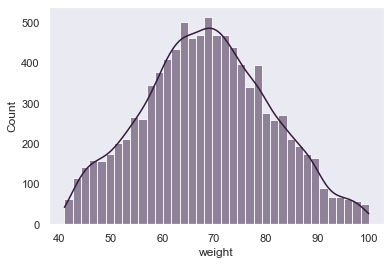

In [ ]:
# sns.kdeplot(data=dataset['weight'])
sns.histplot(data=dataset["weight"], kde=True)

### Spojenie datasetu labor.csv a datasetu profiles.csv

V tejto sekcii sme spojili dáta z labor.csv a dáta z profiles.csv na základe SSN. Odstránili sme nadbytočné záznamy t.j. name_y a index z druhého datasetu (stĺpec Unnamed).

In [ ]:
dataset_final = dataset.merge(dataprofiles, on="ssn", how = 'left')
dataset_final

,name_x,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,...,indicator,hbver,blood_group,company,job,sex,birthdate,race,name_y,address
0,Courtney Sparks,5.10789,0,3.79699,married,211-15-5030,1.36076,65.507480,7.92270,80.65839,...,0.0,6.73439,AB+,Mendez Inc,Printmaker,F,1915-03-29,Black,Courtney Sparks,"7181 Williams Lane\nEast Richardport, MO 70889"
1,David Cook,6.06717,0,6.61722,divorced,134-25-6459,1.10335,80.560530,7.13748,90.67608,...,0.0,6.69188,A-,"Morgan, Wilson and Miller","Surveyor, planning and development",M,1958-12-15,Black,David Cook,"12545 Derek Shore Apt. 068\nLake Jennifer, UT ..."
2,Debra Cameron,8.52161,1,8.76540,married,327-02-6401,3.08378,56.122320,9.11128,57.21363,...,0.0,6.08754,B+,Erickson Inc,Press photographer,F,1906-02-09,Black,Debra Cameron,"815 Sanders Pass Apt. 285\nNancychester, AR 70658"
3,Vincent Mccullough,4.35962,0,6.61320,divorced,469-50-8029,3.91503,93.521070,9.37966,82.12788,...,0.0,6.34100,A-,Sweeney and Sons,"Engineer, manufacturing",M,1908-03-08,White,Vincent Mccullough,"928 Griffin Canyon Apt. 851\nCareyborough, CA ..."
4,Lauren Harris,5.32524,1,6.52586,divorced,755-50-6094,0.89996,57.017680,7.78640,80.50126,...,1.0,6.88636,O-,Luna Group,"Surveyor, mining",F,1927-04-13,Asian,Lauren Harris,9378 Pierce Crescent Suite 407\nEast Jacquelin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,Kenneth Sanchez,4.67432,0,5.22478,married,035-07-2574,0.75385,75.603016,7.40597,80.98445,...,0.0,6.23398,AB-,Herman Inc,Mechanical engineer,M,2008-04-16,Black,Kenneth Sanchez,"831 Brandy Plains\nWilsonmouth, WY 02172"
9709,Jennifer Franklin,5.38144,1,6.77403,widowed,369-05-1763,0.68170,72.437630,7.38835,88.27656,...,1.0,7.56910,AB-,Wilkins and Sons,Catering manager,F,1906-09-12,Black,Jennifer Franklin,"PSC 3172, Box 9852\nAPO AP 12679"
9710,Valerie Carter,4.05369,1,6.30583,married,546-10-0083,0.49297,64.744093,6.22727,49.46443,...,1.0,7.53199,B+,Suarez-Cohen,"Therapist, art",F,1922-01-05,Black,Valerie Carter,"PSC 1199, Box 5372\nAPO AP 19298"
9711,Julie Newman,4.80303,1,6.78358,widowed,556-01-2815,1.92676,57.927510,8.64693,44.97615,...,1.0,4.97849,AB+,"Davila, Ramirez and Jones",Public relations officer,F,1993-09-29,White,Julie Newman,"PSC 6981, Box 6784\nAPO AP 13561"


In [ ]:
dataset_final.drop(columns=["name_y"], inplace=True)
dataset_final.rename(columns={'name_x': 'name'}, inplace=True)
dataset_final

,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,...,trombocyty,indicator,hbver,blood_group,company,job,sex,birthdate,race,address
0,Courtney Sparks,5.10789,0,3.79699,married,211-15-5030,1.36076,65.507480,7.92270,80.65839,...,3.77915,0.0,6.73439,AB+,Mendez Inc,Printmaker,F,1915-03-29,Black,"7181 Williams Lane\nEast Richardport, MO 70889"
1,David Cook,6.06717,0,6.61722,divorced,134-25-6459,1.10335,80.560530,7.13748,90.67608,...,3.77915,0.0,6.69188,A-,"Morgan, Wilson and Miller","Surveyor, planning and development",M,1958-12-15,Black,"12545 Derek Shore Apt. 068\nLake Jennifer, UT ..."
2,Debra Cameron,8.52161,1,8.76540,married,327-02-6401,3.08378,56.122320,9.11128,57.21363,...,5.54453,0.0,6.08754,B+,Erickson Inc,Press photographer,F,1906-02-09,Black,"815 Sanders Pass Apt. 285\nNancychester, AR 70658"
3,Vincent Mccullough,4.35962,0,6.61320,divorced,469-50-8029,3.91503,93.521070,9.37966,82.12788,...,5.34519,0.0,6.34100,A-,Sweeney and Sons,"Engineer, manufacturing",M,1908-03-08,White,"928 Griffin Canyon Apt. 851\nCareyborough, CA ..."
4,Lauren Harris,5.32524,1,6.52586,divorced,755-50-6094,0.89996,57.017680,7.78640,80.50126,...,7.49621,1.0,6.88636,O-,Luna Group,"Surveyor, mining",F,1927-04-13,Asian,9378 Pierce Crescent Suite 407\nEast Jacquelin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,Kenneth Sanchez,4.67432,0,5.22478,married,035-07-2574,0.75385,75.603016,7.40597,80.98445,...,4.59180,0.0,6.23398,AB-,Herman Inc,Mechanical engineer,M,2008-04-16,Black,"831 Brandy Plains\nWilsonmouth, WY 02172"
9709,Jennifer Franklin,5.38144,1,6.77403,widowed,369-05-1763,0.68170,72.437630,7.38835,88.27656,...,8.02259,1.0,7.56910,AB-,Wilkins and Sons,Catering manager,F,1906-09-12,Black,"PSC 3172, Box 9852\nAPO AP 12679"
9710,Valerie Carter,4.05369,1,6.30583,married,546-10-0083,0.49297,64.744093,6.22727,49.46443,...,9.44110,1.0,7.53199,B+,Suarez-Cohen,"Therapist, art",F,1922-01-05,Black,"PSC 1199, Box 5372\nAPO AP 19298"
9711,Julie Newman,4.80303,1,6.78358,widowed,556-01-2815,1.92676,57.927510,8.64693,44.97615,...,6.77935,1.0,4.97849,AB+,"Davila, Ramirez and Jones",Public relations officer,F,1993-09-29,White,"PSC 6981, Box 6784\nAPO AP 13561"


#### Prepísanie dát do numerického formátu

Stĺpec smoker bol už zmenený v predošlej fáze, pretože sme s tým stĺpcom pracovali. Ostatné stĺpce,
ktoré nemajú numerický formát (napr. string) uložíme do inej tabuľky a z pôvodnej tabuľky odstránime tie stĺpce.

In [ ]:
def create_dicts(column_name):
    dictionary = {}
    counter = 0
    for column_name in dataset_final[column_name].unique():
        dictionary[column_name] = counter
        counter += 1

    return dictionary

def change_values(dictionary, column_name):
     dataset_final[column_name].replace(dictionary, inplace=True)

relationship_dict = create_dicts("relationship")
change_values(relationship_dict,"relationship")

blood_group_dict = create_dicts("blood_group")
change_values(blood_group_dict,"blood_group")

sex_dict = create_dicts("sex")
change_values(sex_dict, "sex")

race_dict = create_dicts("race")
change_values(race_dict,"race")

dataset_final
#dataset = dataset_final.copy()

,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,...,trombocyty,indicator,hbver,blood_group,company,job,sex,birthdate,race,address
0,Courtney Sparks,5.10789,0,3.79699,0,211-15-5030,1.36076,65.507480,7.92270,80.65839,...,3.77915,0.0,6.73439,0,Mendez Inc,Printmaker,0,1915-03-29,0,"7181 Williams Lane\nEast Richardport, MO 70889"
1,David Cook,6.06717,0,6.61722,1,134-25-6459,1.10335,80.560530,7.13748,90.67608,...,3.77915,0.0,6.69188,1,"Morgan, Wilson and Miller","Surveyor, planning and development",1,1958-12-15,0,"12545 Derek Shore Apt. 068\nLake Jennifer, UT ..."
2,Debra Cameron,8.52161,1,8.76540,0,327-02-6401,3.08378,56.122320,9.11128,57.21363,...,5.54453,0.0,6.08754,2,Erickson Inc,Press photographer,0,1906-02-09,0,"815 Sanders Pass Apt. 285\nNancychester, AR 70658"
3,Vincent Mccullough,4.35962,0,6.61320,1,469-50-8029,3.91503,93.521070,9.37966,82.12788,...,5.34519,0.0,6.34100,1,Sweeney and Sons,"Engineer, manufacturing",1,1908-03-08,1,"928 Griffin Canyon Apt. 851\nCareyborough, CA ..."
4,Lauren Harris,5.32524,1,6.52586,1,755-50-6094,0.89996,57.017680,7.78640,80.50126,...,7.49621,1.0,6.88636,3,Luna Group,"Surveyor, mining",0,1927-04-13,2,9378 Pierce Crescent Suite 407\nEast Jacquelin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,Kenneth Sanchez,4.67432,0,5.22478,0,035-07-2574,0.75385,75.603016,7.40597,80.98445,...,4.59180,0.0,6.23398,5,Herman Inc,Mechanical engineer,1,2008-04-16,0,"831 Brandy Plains\nWilsonmouth, WY 02172"
9709,Jennifer Franklin,5.38144,1,6.77403,5,369-05-1763,0.68170,72.437630,7.38835,88.27656,...,8.02259,1.0,7.56910,5,Wilkins and Sons,Catering manager,0,1906-09-12,0,"PSC 3172, Box 9852\nAPO AP 12679"
9710,Valerie Carter,4.05369,1,6.30583,0,546-10-0083,0.49297,64.744093,6.22727,49.46443,...,9.44110,1.0,7.53199,2,Suarez-Cohen,"Therapist, art",0,1922-01-05,0,"PSC 1199, Box 5372\nAPO AP 19298"
9711,Julie Newman,4.80303,1,6.78358,5,556-01-2815,1.92676,57.927510,8.64693,44.97615,...,6.77935,1.0,4.97849,0,"Davila, Ramirez and Jones",Public relations officer,0,1993-09-29,1,"PSC 6981, Box 6784\nAPO AP 13561"


In [ ]:
dataset_identifiers = dataset_final[['name','ssn','job','company','address','birthdate']].copy()

In [ ]:
dataset_identifiers

,name,ssn,job,company,address,birthdate
0,Courtney Sparks,211-15-5030,Printmaker,Mendez Inc,"7181 Williams Lane\nEast Richardport, MO 70889",1915-03-29
1,David Cook,134-25-6459,"Surveyor, planning and development","Morgan, Wilson and Miller","12545 Derek Shore Apt. 068\nLake Jennifer, UT ...",1958-12-15
2,Debra Cameron,327-02-6401,Press photographer,Erickson Inc,"815 Sanders Pass Apt. 285\nNancychester, AR 70658",1906-02-09
3,Vincent Mccullough,469-50-8029,"Engineer, manufacturing",Sweeney and Sons,"928 Griffin Canyon Apt. 851\nCareyborough, CA ...",1908-03-08
4,Lauren Harris,755-50-6094,"Surveyor, mining",Luna Group,9378 Pierce Crescent Suite 407\nEast Jacquelin...,1927-04-13
...,...,...,...,...,...,...
9708,Kenneth Sanchez,035-07-2574,Mechanical engineer,Herman Inc,"831 Brandy Plains\nWilsonmouth, WY 02172",2008-04-16
9709,Jennifer Franklin,369-05-1763,Catering manager,Wilkins and Sons,"PSC 3172, Box 9852\nAPO AP 12679",1906-09-12
9710,Valerie Carter,546-10-0083,"Therapist, art",Suarez-Cohen,"PSC 1199, Box 5372\nAPO AP 19298",1922-01-05
9711,Julie Newman,556-01-2815,Public relations officer,"Davila, Ramirez and Jones","PSC 6981, Box 6784\nAPO AP 13561",1993-09-29


In [ ]:
dataset_final.drop(columns=['name','ssn','job','company','address','birthdate'], inplace=True)

dataset_final.head()

,hematokrit,smoker,leukocyty,relationship,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver,blood_group,sex,race
0,5.10789,0,3.79699,0,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,3.77915,0.0,6.73439,0,0,0
1,6.06717,0,6.61722,1,1.10335,80.56053,7.13748,90.67608,51.14865,27.63148,6.17378,6.30636,3.77915,0.0,6.69188,1,1,0
2,8.52161,1,8.76540,0,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754,2,0,0
3,4.35962,0,6.61320,1,3.91503,93.52107,9.37966,82.12788,71.76488,53.04260,6.18335,5.69975,5.34519,0.0,6.34100,1,1,1
4,5.32524,1,6.52586,1,0.89996,57.01768,7.78640,80.50126,44.08776,60.41555,5.33112,6.68497,7.49621,1.0,6.88636,3,0,2


## 2. Realizácia predspracovania dát

Dataset sme rozdelili na trénovaciu a testovaciu sadu s pomerom 4:1. Jednotlivé záznamy sa vybrali náhodne.

In [ ]:
from sklearn.model_selection import train_test_split


train, test =train_test_split(dataset_final, test_size=0.2, shuffle=True)

In [ ]:
train

,hematokrit,smoker,leukocyty,relationship,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver,blood_group,sex,race
1246,4.32488,0,7.88909,4,0.78833,66.969960,6.86350,59.66693,36.10602,37.61764,6.46131,7.38775,8.74185,1.0,6.42456,7,0,1
4720,6.61149,0,5.43118,3,0.63096,46.623080,6.29658,77.28613,69.12510,51.38156,6.52125,7.15249,8.95338,1.0,6.50331,2,1,4
6949,8.65770,1,7.86702,1,1.19553,90.935690,7.62417,61.80006,54.28053,44.36097,7.17363,7.39896,6.75122,0.0,6.97779,6,1,1
6558,7.22210,0,3.82491,4,0.55274,73.180845,6.12845,84.95873,57.83248,32.10155,6.34056,6.51958,7.17634,1.0,8.09142,2,1,0
6585,5.47911,1,5.77278,1,0.97063,52.627518,7.62637,32.52412,32.96870,49.64333,5.41121,4.80315,7.61997,1.0,6.09690,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,5.27828,0,6.23892,4,1.12612,80.689307,8.00096,77.63897,41.62734,68.79046,7.40866,5.38935,7.39489,1.0,5.89905,0,1,1
1433,8.89355,1,5.08450,5,0.42846,59.762165,4.41743,77.53772,41.85194,50.92572,7.15762,5.41634,6.57129,1.0,5.03382,2,0,1
9639,6.05280,0,8.21878,0,0.97216,61.872078,7.44438,88.68346,42.01375,59.11586,7.55381,6.03295,7.74034,1.0,7.06707,4,0,0
7671,8.17850,0,8.46980,5,1.12606,63.076389,7.71805,85.07233,45.07966,60.45649,7.86869,5.74648,6.00623,0.0,5.84404,4,0,1


In [ ]:
test

,hematokrit,smoker,leukocyty,relationship,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver,blood_group,sex,race
4106,6.35377,0,7.79340,4,0.87637,95.086740,7.51609,88.75405,37.87394,35.75985,5.96522,6.59630,7.60564,1.0,7.14342,6,1,1
3433,6.32942,1,6.51064,4,1.78875,76.175710,8.32401,78.81830,56.21810,43.20273,6.06133,7.08519,6.81157,0.0,6.10251,3,1,0
1471,6.14155,0,7.06420,3,0.82709,72.124530,7.19777,88.68544,58.03960,52.82136,4.86868,6.72680,7.92090,1.0,4.82690,0,1,1
4513,7.16509,1,5.49208,1,0.60964,70.748462,6.74668,87.00050,70.53590,42.42629,6.83760,5.57020,4.84401,0.0,5.61119,6,1,0
5525,5.12104,1,6.72825,0,3.91503,61.380590,9.37966,84.14117,36.33486,54.47390,6.91518,6.12905,5.83885,1.0,6.87674,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9576,4.79671,1,5.62952,4,1.70636,81.457052,8.52805,86.80890,43.21435,68.70718,7.18049,6.63009,6.93356,1.0,7.97956,3,1,1
338,4.70017,0,7.51771,4,1.58705,70.550260,8.34747,56.44920,45.35682,35.78101,4.93954,4.91088,7.07611,1.0,6.46078,4,0,1
8238,6.50993,0,7.21733,2,0.72816,67.082062,7.22171,69.74040,32.96870,32.74374,7.84600,7.19912,7.78809,1.0,5.81470,1,0,1
3226,5.03677,0,6.77409,4,0.61368,63.055754,6.70198,78.72528,52.97405,62.57208,4.86868,5.61756,9.44110,1.0,6.24703,6,0,0


### Transformovanie atribútov dát pre strojové učenie

Pozrime sa na stĺpec **alp** pred tranformáciou. Vidíme, že táto distribúcia je neparametrická.

((array([-3.74777764, -3.51907419, -3.39334597, ...,  3.39334597,
          3.51907419,  3.74777764]),
  array([32.52412, 32.52412, 32.52412, ..., 90.67608, 90.67608, 90.67608])),
 (15.24961485172266, 72.6070957966538, 0.9310826411591168))

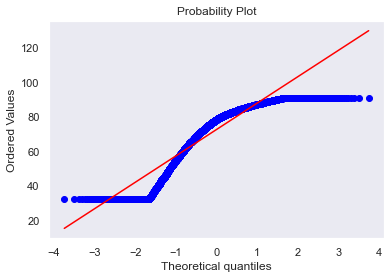

In [ ]:
sc.stats.probplot(train["alp"], plot=sns.mpl.pyplot, fit=True)

### Transformovanie atribútov pomocou techniky Power Transformer

Technika power transformer nám z neparametrickej distribúcie spraví parametrickú distribúciu. Dozvedeli sme sa, že
väčšina ML algoritmov pracuje lepšie s Gaussovou distribúciou.

Zdroj: https://machinelearningmastery.com/power-transforms-with-scikit-learn/

((array([-3.74777764, -3.51907419, -3.39334597, ...,  3.39334597,
          3.51907419,  3.74777764]),
  array([ 15691.81860289,  15691.81860289,  15691.81860289, ...,
         344312.16362217, 344312.16362217, 344312.16362217])),
 (96770.00435847991, 200749.79953144703, 0.968447552314474))

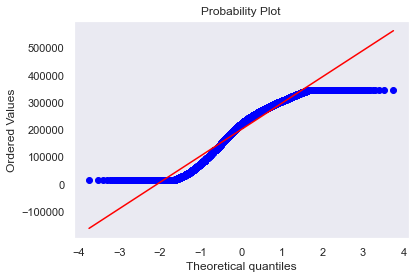

In [ ]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson', standardize=False,)
trans = power.fit_transform(train)
trans_train = pd.DataFrame(trans)
trans_train.columns = train.columns.copy()
trans_train.describe()
sc.stats.probplot(trans_train["alp"], plot=sns.mpl.pyplot)

Môžeme vidieť, že táto distribúcia už má krivku podobnú Gaussovej.

### Transformovanie atribútov pomocou techniky Scaling Normalization.

Scaling Normalalization nám zmení rozsah hodnôt od 0 po 1. Z daného zdroju https://towardsdatascience.com/beginner-explanation-for-data-transformation-9add3102f3bf
sme sa dozvedeli, že umelá inteligencia pracuje lepšie pri rozsahu dát od 0 po 1.

((array([-3.74777764, -3.51907419, -3.39334597, ...,  3.39334597,
          3.51907419,  3.74777764]),
  array([0., 0., 0., ..., 1., 1., 1.])),
 (0.2944735644800076, 0.5631361044237829, 0.9684475523144741))

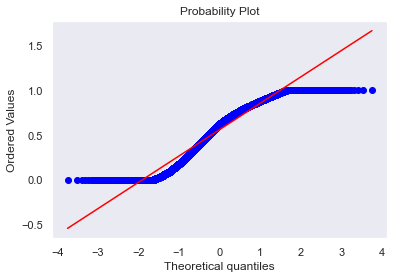

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(trans_train)
scaled_train = pd.DataFrame(scaled)
scaled_train.columns = train.columns.copy()
scaled_train.describe()
sc.stats.probplot(scaled_train["alp"], plot=sns.mpl.pyplot)

Všetky hodnoty atribútov sú teraz v rozsahu od 0 po 1.

## 3. Výber atribútov pre strojové učenie

Najprv sme vypísali náš dataset po transformovaní

In [ ]:
scaled_train.columns = train.columns.copy()
scaled_train

,hematokrit,smoker,leukocyty,relationship,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver,blood_group,sex,race
0,0.072661,0.0,0.774724,0.877484,0.448664,0.469522,0.492531,0.247232,0.086639,0.246100,0.503897,0.783297,0.858971,1.0,0.492920,1.000000,0.0,0.463925
1,0.570288,0.0,0.337040,0.734658,0.337582,0.106930,0.384292,0.597525,0.935786,0.570029,0.522390,0.712873,0.901169,1.0,0.517029,0.355540,1.0,1.000000
2,0.902896,1.0,0.771070,0.336820,0.643258,0.859965,0.641456,0.280248,0.565841,0.406677,0.721720,0.786648,0.482679,0.0,0.661953,0.884829,1.0,0.463925
3,0.678000,0.0,0.006180,0.877484,0.271079,0.573908,0.352665,0.812060,0.655847,0.111551,0.466548,0.522618,0.559762,1.0,1.000000,0.355540,1.0,0.000000
4,0.345714,1.0,0.402121,0.336820,0.548911,0.217720,0.641892,0.000000,0.000000,0.529914,0.174550,0.000000,0.642145,1.0,0.392432,0.000000,0.0,0.463925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,0.301856,0.0,0.488468,0.877484,0.616937,0.696950,0.716717,0.606495,0.235980,0.961728,0.792701,0.179682,0.600103,1.0,0.331613,0.000000,1.0,0.463925
7766,0.936644,1.0,0.269291,1.000000,0.145165,0.345025,0.044178,0.603913,0.241978,0.559529,0.716869,0.187924,0.450616,1.0,0.064283,0.355540,0.0,0.463925
7767,0.463957,0.0,0.828794,0.000000,0.549650,0.381869,0.605887,0.931647,0.246295,0.746171,0.836329,0.375493,0.664834,1.0,0.689160,0.637349,0.0,0.000000
7768,0.831737,0.0,0.869350,1.000000,0.616913,0.402747,0.660117,0.815553,0.327557,0.776339,0.930442,0.288516,0.352162,0.0,0.314683,0.637349,0.0,0.463925


Dataset sme rozdelili na input a output. Output pre nás bude stĺpec **indicator** a tým pádom input budú všetky ostatné
 stĺpce.

In [ ]:
train_trans_output = scaled_train["indicator"]
train_trans_input = scaled_train.copy()
train_trans_input.drop('indicator', axis='columns', inplace=True)
train_trans_output = train_trans_output.astype(np.int64)
train_trans_output



0       0
1       0
2       0
3       0
4       0
       ..
7765    0
7766    0
7767    0
7768    0
7769    0
Name: indicator, Length: 7770, dtype: int64

Pomocou funkcie **SelectFromModel()** sme dostali koeficienty atribútov, ktoré nám ukazujú ako daný atribút vplýva na indicator.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


selector = SelectFromModel(estimator=LogisticRegression()).fit(train_trans_input, train_trans_output)
selector_coef = selector.estimator_.coef_
print("Koeficient:",selector_coef)
print("Threshold:",selector.threshold_)
print("Boolean hodnoty:",selector.get_support())

#alt, erytrocyty, trombocyty

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

Dané atributý sme zoradili podľa dôležitosti od najvyššej po najnižšiu. Vyšlo nám, že najvyššiu dôležitosť má atribút
trombocyty a najnižšiu atribút hbver.

Taktiež sme zistili, že vplyv na indikátor majú len 3 atribúty: **trombocyty**, **erytrocyty** a **alt**

In [ ]:
data = [train_trans_input.columns ,selector.estimator_.coef_]
new_selector_coef = []
temp_selector_coef = []
for i in range(len(selector_coef[0])):
    new_selector_coef.append(selector_coef[0][i])
    temp_selector_coef.append(np.abs(selector_coef[0][i]))
d = {'name': train_trans_input.columns, 'values': new_selector_coef, 'col3': temp_selector_coef, 'impact': selector.get_support()}
selector_dataset = pd.DataFrame(data=d)
selector_dataset.sort_values(by=['col3'], axis = 0, inplace = True, ascending=False)
selector_dataset.drop('col3', axis='columns', inplace=True)
selector_dataset.reset_index(inplace=True, drop=True)
#print(selector_dataset)
selector_dataset.style

In [ ]:
correllation = dataset.corr()
correllation.style.background_gradient(cmap='coolwarm')

Vybrané atribúty z funkcie SelectFromModel nám sedia s koreláciami z heatmapy.

Druhý spôsob výberu atribútov

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(train_trans_input, train_trans_output)

print(selector.support_)
print(selector.ranking_)

Pomocou **Recursive Feature Elimination** sme zistili ďalšie dva atribúty, ktoré majú taktiež vplyv
na indikátor. Dokopy sme vybrali 5 atribútov pre strojové učenie:

**Trombocyty, Erytrocyty, Alt, Hematokrit a Leukocyty**

In [ ]:
train_trans_input.head()

## 4. Replikovateľnosť predspracovania

Na transformáciu dát sme si vytvorili funkciu transform(). V nej sme použili funkciu Pipeline z knižnice sklearn.pipeline, pomocou ktorej vieme zjednodušiť transformácie. Najprv sa vykoná transformácia Power Transformer a následne sa vykoná Scaling Normalization.

In [ ]:
from sklearn.pipeline import Pipeline

def transform(dataset):
    pipeline = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson', standardize=False,)),
    ('scaler', MinMaxScaler())
    ])
    new = pipeline.fit_transform(dataset)
    new = pd.DataFrame(new)
    new.columns = dataset.columns.copy()
    return new

In [ ]:
scaled_test = transform(test)
scaled_test.describe()

#### Uloženie dát

In [ ]:
dataset_identifiers.to_csv("faza2/dataset_identifiers.csv")
scaled_train.to_csv("faza2/train_dataset.csv")
scaled_test.to_csv("faza2/test_dataset.csv")